In [156]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa as lb
import librosa.display
import soundfile as sf
from skimage.metrics import structural_similarity as ssim

In [402]:
path = "/Users/rajeshr/Desktop/Outputs/22/"
outpath = "/Users/rajeshr/Desktop/Outputs/reconst/"

In [158]:
bvocal, fs = lb.load(path+'bvocal.wav')
bbass, fs = lb.load(path+'bbass.wav')
bdrums, fs = lb.load(path+'bdrums.wav')
bother, fs = lb.load(path+'bother.wav')

tvocal, fs = lb.load(path+'tvocal.wav')
tbass, fs = lb.load(path+'tbass.wav')
tdrums, fs = lb.load(path+'tdrums.wav')
tother, fs = lb.load(path+'tother.wav')

pvocal, fs = lb.load(path+'pvocal.wav')
pbass, fs = lb.load(path+'pbass.wav')
pdrums, fs = lb.load(path+'pdrums.wav')
pother, fs = lb.load(path+'pother.wav')

In [159]:
bv = lb.stft(bvocal)
bb = lb.stft(bbass)
bd = lb.stft(bdrums)
bo = lb.stft(bother)

tv = lb.stft(tvocal)
tb = lb.stft(tbass)
td = lb.stft(tdrums)
to = lb.stft(tother)

pv = lb.stft(pvocal)
pb = lb.stft(pbass)
pd = lb.stft(pdrums)
po = lb.stft(pother)

In [160]:
bv_db = lb.amplitude_to_db(np.abs(bv))
bb_db = lb.amplitude_to_db(np.abs(bb))
bd_db = lb.amplitude_to_db(np.abs(bd))
bo_db = lb.amplitude_to_db(np.abs(bo))

tv_db = lb.amplitude_to_db(np.abs(tv))
tb_db = lb.amplitude_to_db(np.abs(tb))
td_db = lb.amplitude_to_db(np.abs(td))
to_db = lb.amplitude_to_db(np.abs(to))

pv_db = lb.amplitude_to_db(np.abs(pv))
pb_db = lb.amplitude_to_db(np.abs(pb))
pd_db = lb.amplitude_to_db(np.abs(pd))
po_db = lb.amplitude_to_db(np.abs(po))

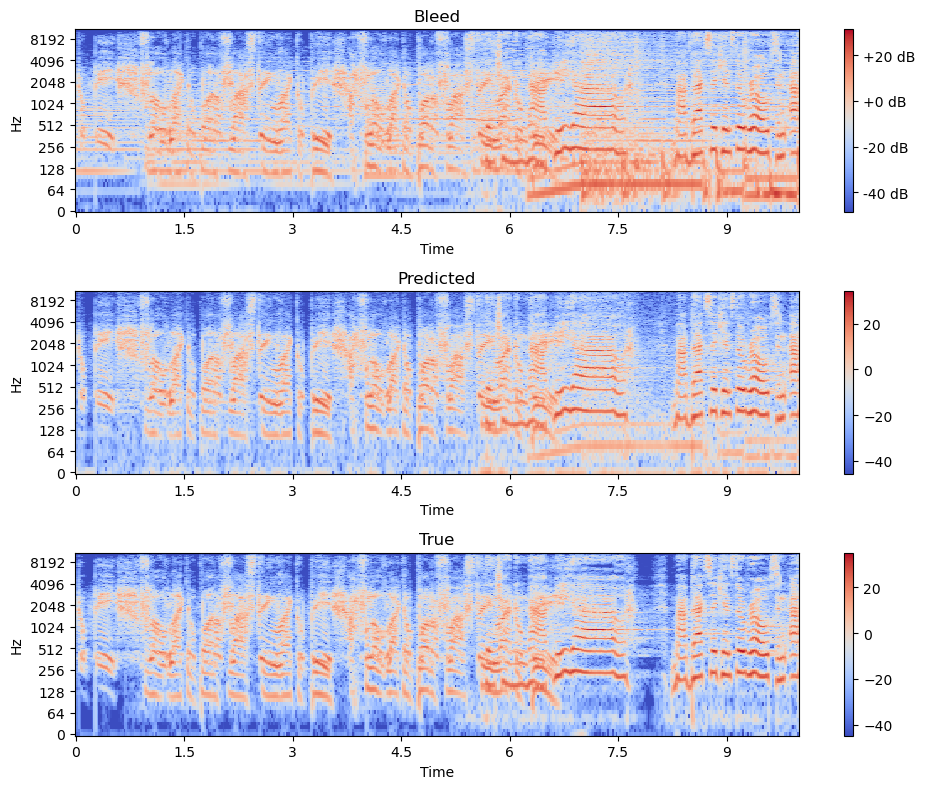

In [161]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(3, 1, 2)
librosa.display.specshow(pv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(3, 1, 3)
librosa.display.specshow(tv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.tight_layout()
plt.show()

In [322]:
# Vocals

change = ((np.abs(pv) - np.abs(bv))/(np.abs(bv)))
print(np.min(change), np.max(change), np.median(change))
threshold = -0.1
mask = change >= threshold
predicted = mask * np.abs(bv)
average = (predicted + np.abs(pv))/2
predicted_db = lb.amplitude_to_db(average)
reconst = average * np.angle(bv)
reconst = lb.istft(reconst)
sf.write('/Users/rajeshr/Desktop/reconst_vocal.wav', reconst, fs)

-0.99950534 564239.7 0.14192536


In [404]:
# Bass

change = ((np.abs(pb) - np.abs(bb))/(np.abs(bb)))
print(np.min(change), np.max(change), np.median(change))

threshold2, threshold2_ = -0.1, 1
maskb1 = change >= threshold2 
maskb2 = change <= threshold2_
mask = maskb1 & maskb2

predicted = mask * np.abs(tb)
average = predicted
predicted_db = lb.amplitude_to_db(average)
reconst = average * np.angle(tb)
reconst = lb.istft(reconst)
sf.write(outpath+'/reconst_bass.wav', reconst, fs)

-0.9996849 36621.29 -0.7284046


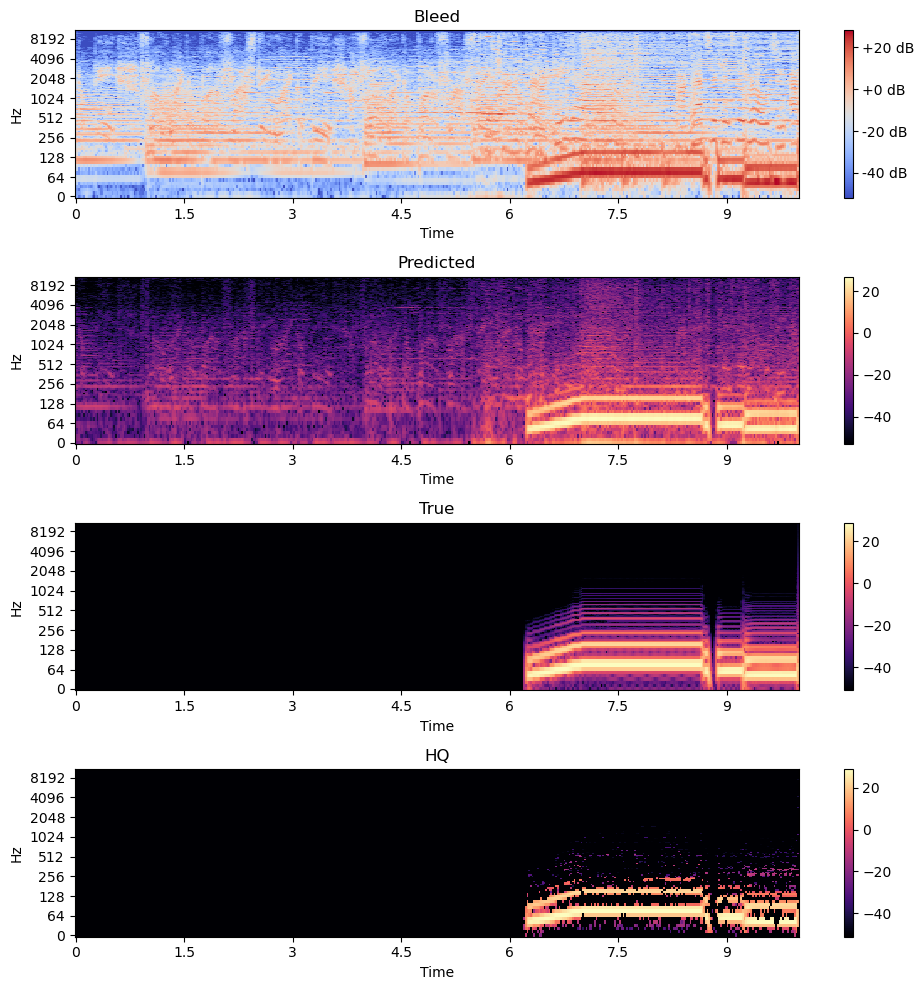

In [405]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bb_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(pb_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(tb_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

In [406]:
# Drums

change = ((np.abs(pd) - np.abs(bd))/(np.abs(bd)))
print(np.min(change), np.max(change), np.median(change))

threshold2, threshold2_ = -0.1, 1
maskd1 = change >= threshold2 
maskd2 = change <= threshold2_
mask = maskd1 & maskd2

predicted = mask * np.abs(td)
average = predicted
predicted_db = lb.amplitude_to_db(average)
reconst = average * (mask * np.angle(td))
reconst = lb.istft(reconst)

sf.write(outpath+'/reconst_drums.wav', reconst, fs)

-0.9995207 70841.086 -0.21531197


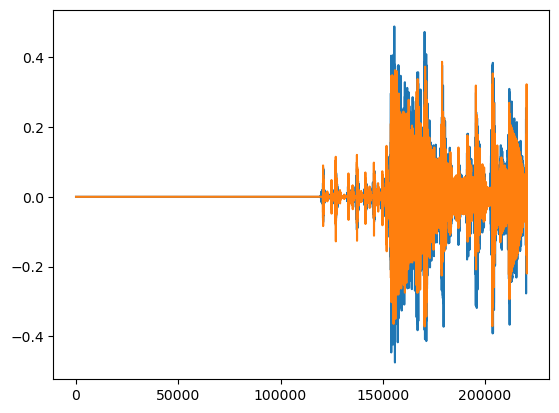

In [407]:
plt.plot(reconst)
plt.plot(tdrums)

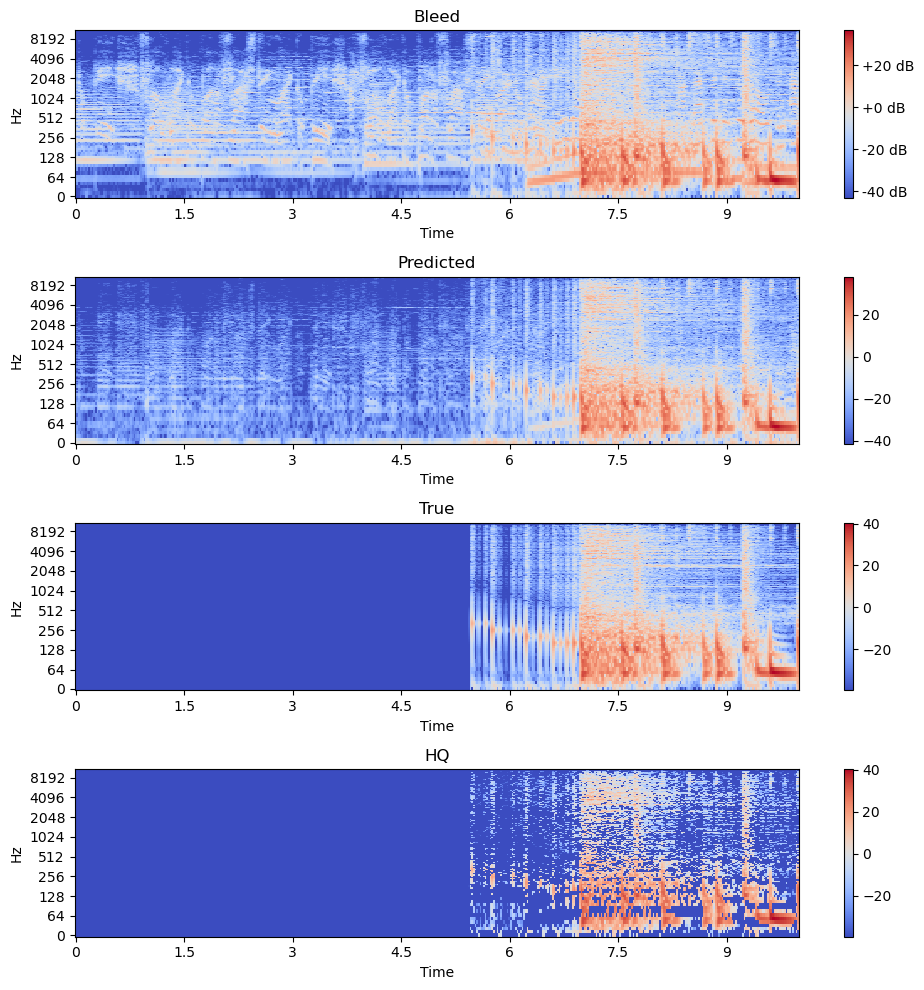

In [408]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bd_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(pd_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(td_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

In [394]:
# Other

change = ((np.abs(po) - np.abs(bo))/(np.abs(bo)))
print(np.min(change), np.max(change), np.median(change))
threshold = -0.1
mask = change >= threshold
predicted = mask * np.abs(bo)
average = (predicted + np.abs(po))/2
predicted_db = lb.amplitude_to_db(average)
reconst = average * np.angle(bo)
reconst = lb.istft(reconst)
sf.write('/Users/rajeshr/Desktop/reconst_other.wav', reconst, fs)

-0.99720836 2401551.8 0.1664905


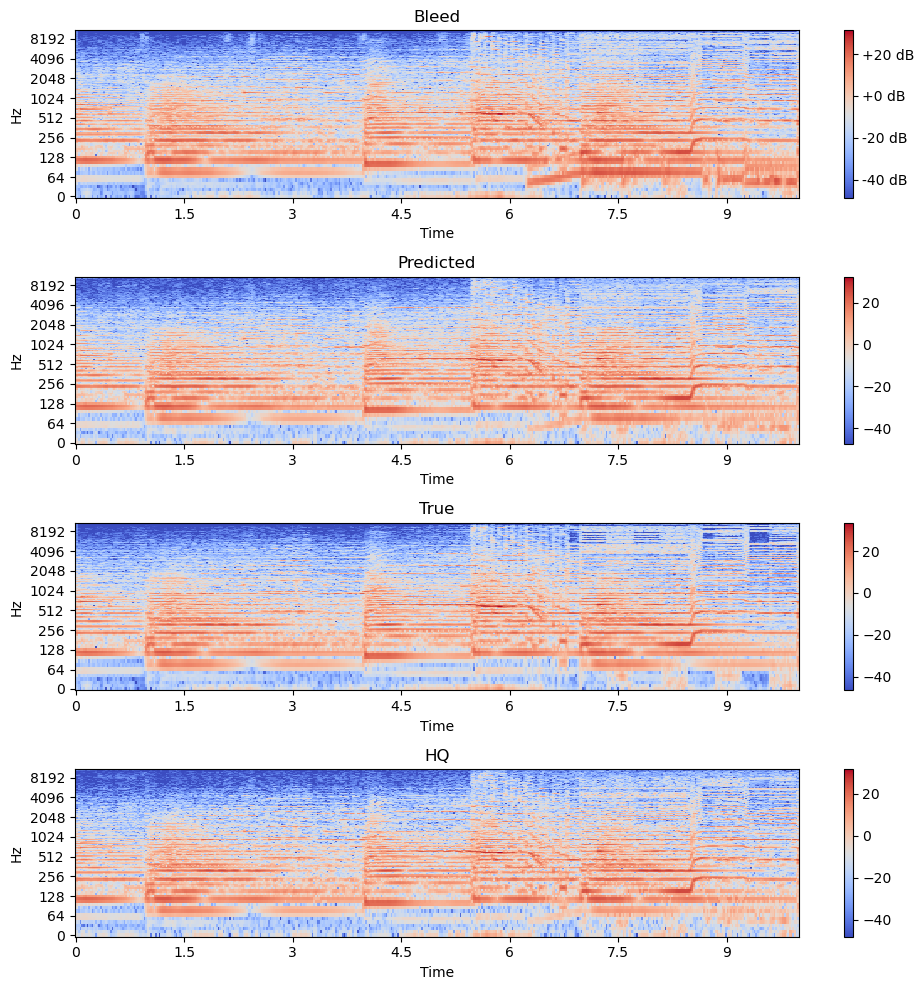

In [395]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bo_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(po_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(to_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

In [162]:
bmedian = np.median(np.abs(pv))
bmedian

0.07464553

In [163]:
threshold = bmedian + (4*0.97)  # Adjust the threshold value as desired
mask = pv >= threshold

In [89]:
np.std(np.abs(pv)), np.max(np.abs(pv)), np.min(np.abs(pv))

(0.9715703, 51.372257, 3.053875e-05)

In [90]:
threshold

3.9546455267071723

In [92]:
pred = mask*bv
pred_db = lb.amplitude_to_db(np.abs(pred))

In [152]:
bmedian = np.median(np.abs(pv))
mask2 = bv_db.copy()
threshold = bmedian + (3*0.97)
a = 0.2
mask2[mask2 < threshold] *= a

In [153]:
audio = mask2 * np.angle(bv)

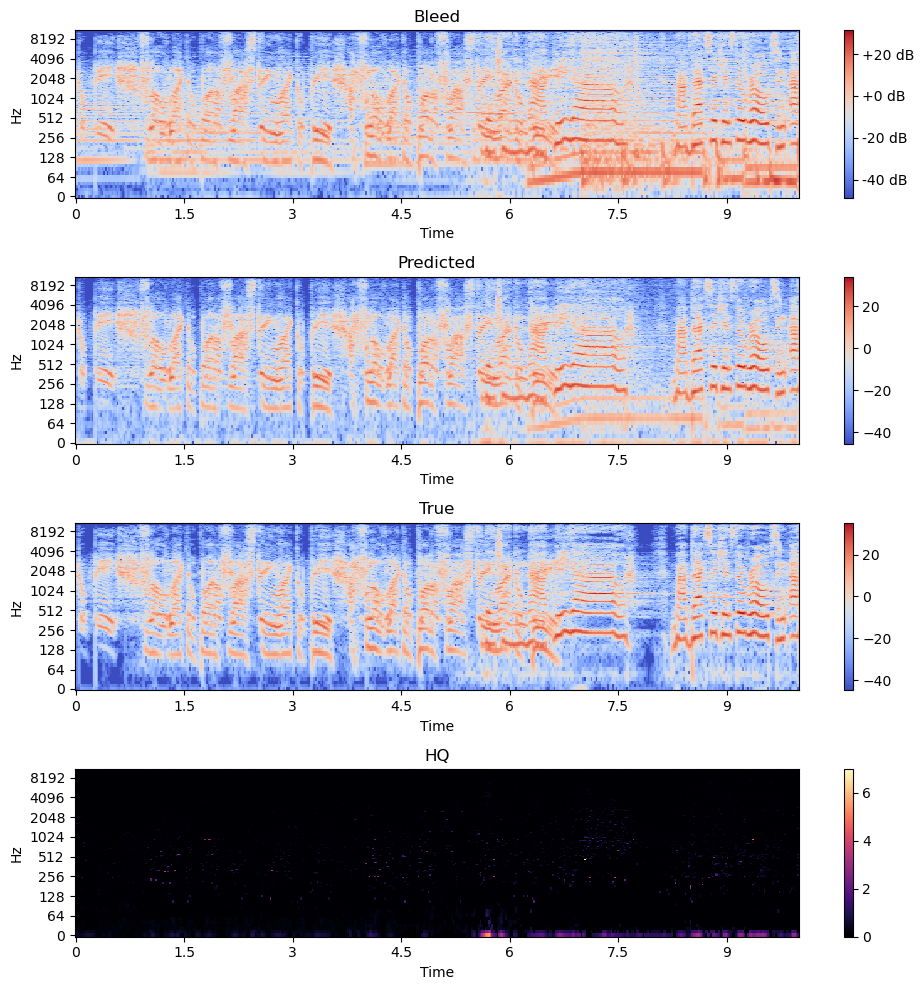

In [228]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(pv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(tv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

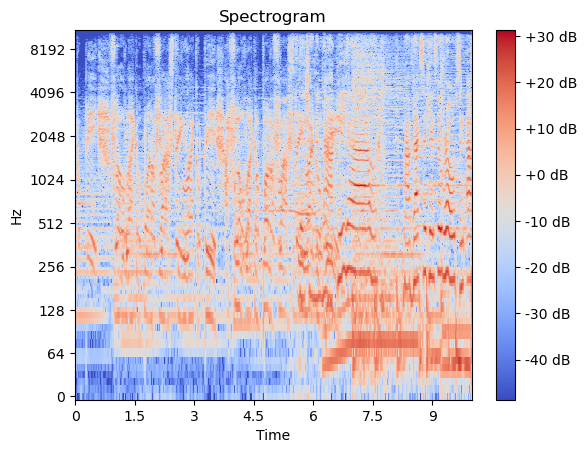

In [161]:
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [162]:
threshold_db = 14.79  # Adjust the threshold value as desired
mask = bv_db >= threshold_db

In [163]:
np.mean(bv_db), np.median(bv_db), np.min(bv_db), np.max(bv_db), np.sqrt(np.var(bv_db))

(-21.98137, -21.025532, -48.695248, 31.304752, 14.79795)

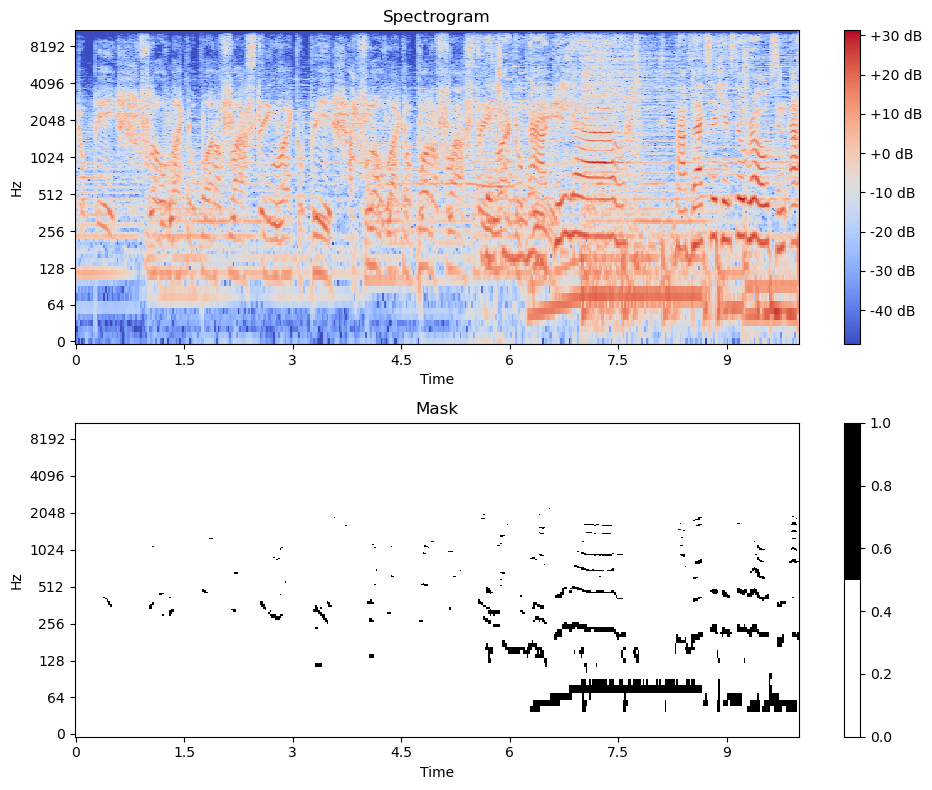

In [164]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mask')

plt.tight_layout()
plt.show()

-21.226677 -21.098091 -44.86993 35.13007 14.975443


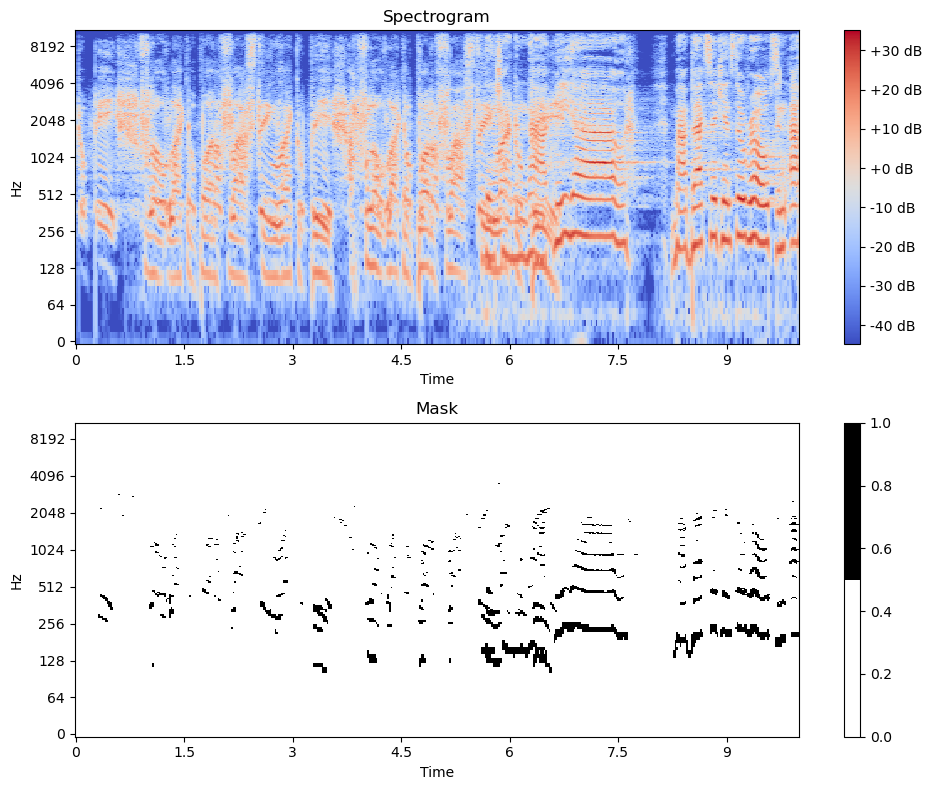

In [66]:
threshold_db = 14.97  # Adjust the threshold value as desired
mask = tv_db >= threshold_db

print(np.mean(tv_db), np.median(tv_db), np.min(tv_db), np.max(tv_db), np.sqrt(np.var(tv_db)))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(tv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mask')

plt.tight_layout()
plt.show()

-21.629011 -22.539923 -45.785427 34.214573 13.814706


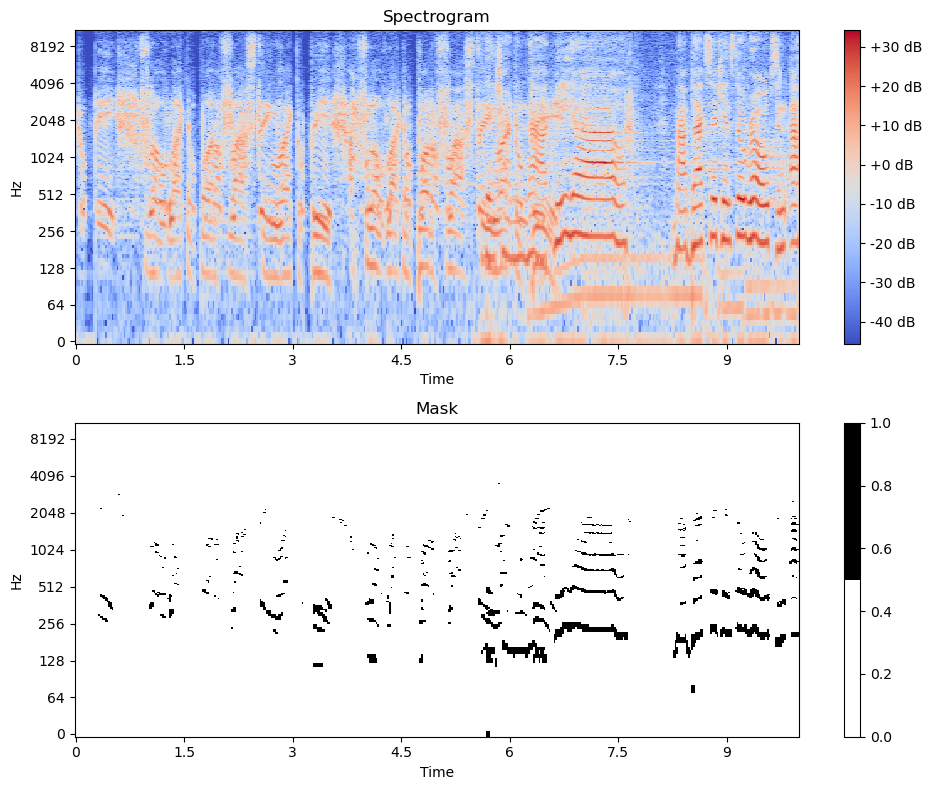

In [69]:
threshold_db = 13.81  # Adjust the threshold value as desired
mask = pv_db >= threshold_db

print(np.mean(pv_db), np.median(pv_db), np.min(pv_db), np.max(pv_db), np.sqrt(np.var(pv_db)))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(pv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mask')

plt.tight_layout()
plt.show()

In [71]:
masked_spectrogram = tv_db * mask #(got using predicted)

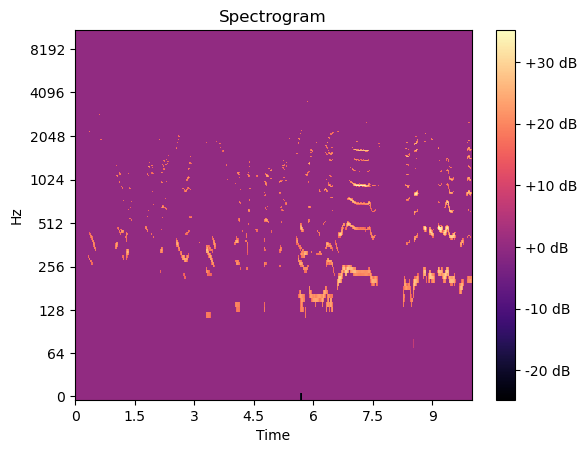

In [72]:
librosa.display.specshow(masked_spectrogram, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [88]:
phase = np.angle(lb.stft(tvocal))

In [91]:
masked_spectrogram.shape, phase.shape

((1025, 431), (1025, 431))

In [92]:
output = masked_spectrogram * np.exp(1j * phase)

In [94]:
out_time = lb.istft(output)

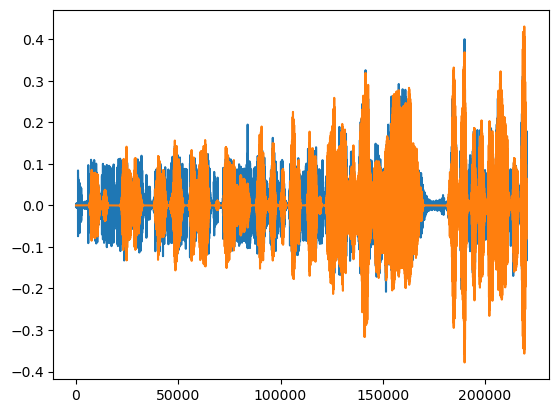

In [96]:
plt.plot(tvocal)
plt.plot(out_time)

In [103]:
sf.write(path+'reconst.wav', out_time, fs)

In [145]:
mask = pv_db.copy()
a = 0
mask[mask < threshold_db] *= a

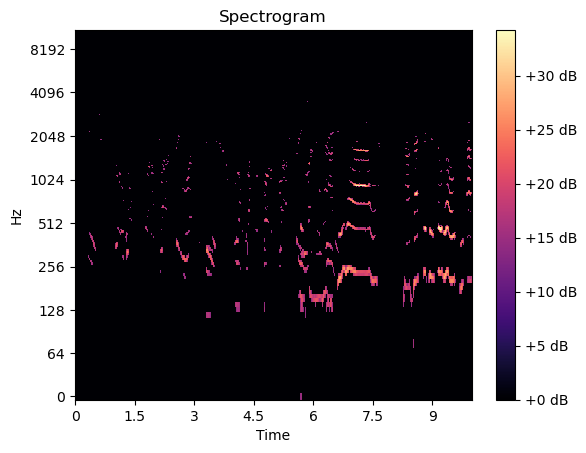

In [146]:
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [147]:
masked_spectrogram2 = tv_db * mask #(got using predicted)

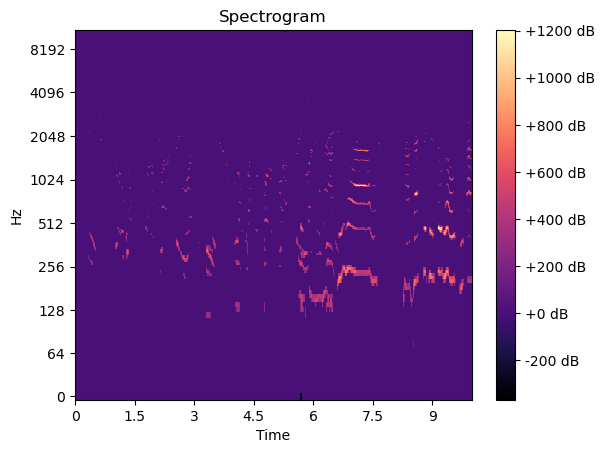

In [148]:
librosa.display.specshow(masked_spectrogram2, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [133]:
output = masked_spectrogram2 * np.exp(1j * phase)
out_time = lb.istft(output)

In [134]:
sf.write(path+'reconst2.wav', out_time, fs)

In [478]:
def split_image_into_patches(image, patch_size):
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the number of patches in each dimension
    num_patches_h = height // patch_size[0]
    num_patches_w = width // patch_size[1]

    patches = []
    # Split the image into patches
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            patch = image[i * patch_size[0]: (i + 1) * patch_size[0],
                          j * patch_size[1]: (j + 1) * patch_size[1]]
            patches.append(patch)

    return patches

def reconstruct_image_from_patches(patches, image_shape):
    # Get image dimensions
    height, width = image_shape[:2]

    # Calculate the number of patches in each dimension
    num_patches_h = height // patches[0].shape[0]
    num_patches_w = width // patches[0].shape[1]

    # Create an empty image for reconstruction
    reconstructed_image = np.zeros(image_shape, dtype=np.uint8)

    # Reconstruct the image from patches
    patch_index = 0
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            patch = patches[patch_index]
            reconstructed_image[i * patch.shape[0]: (i + 1) * patch.shape[0],
                                j * patch.shape[1]: (j + 1) * patch.shape[1]] = patch
            patch_index += 1

    return reconstructed_image

In [118]:
import numpy

In [128]:
x = [-1, 1, -1, 1]
point = 4
N = len(x)

In [129]:
Xk = []
for k in range(0, point):
    res = 0
    for n in range(0, N):
        res = res + x[n] * np.exp(-1j*np.pi*2*k*n/N)
    Xk.append(res)

In [130]:
print(np.round(Xk))

[ 0.+0.j -0.+0.j -4.-0.j  0.+0.j]
